# Supervised Learning : Classification Task

## Context

You are a data scientist working for a historical research institution. As part of a project on early 20th century maritime disasters, you have been tasked with studying the tragic sinking of the Titanic. Specifically, the organization is interested in understanding the factors that contributed to a passenger's likelihood of survival.

The institution has collected a dataset containing information about the Titanic passengers, including their age, sex, passenger class (1st, 2nd, or 3rd class), and whether or not they survived the disaster. They want you to create a machine learning model to predict a passenger's likelihood of survival based on these features.

In addition to building the model, the institution also wants to understand the decision-making process of the model. This will not only shed light on what factors were most important in determining a passenger's survival, but will also provide insights that can guide future historical research.


This context can set the stage for the data loading, preprocessing, model training, and model evaluation steps provided in the activity. The visualization of the decision tree can be presented as a way for the researchers to understand what factors the model deems important in predicting a passenger's survival.

In [2]:
import seaborn as sns # To load the titanic data set too

from sklearn.preprocessing import OneHotEncoder # to encode the categorical variable
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # For visualization of the Tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

## 1. Data Loading

We will start by loading the data. The Titanic dataset is available in many repositories and platforms, including directly via seaborn library.

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Data Preprocessing

Before training the model, we need to preprocess the data. This includes handling missing values, converting categorical data into numerical data, and splitting the data into training and testing sets.

- Handle missing values

In [4]:
# Handle missing values
titanic = titanic.dropna()

- Categorical encoding

In [22]:
# Convert categorical data into numerical data
encoder = OneHotEncoder(sparse=False)
titanic['sex'] = encoder.fit_transform(titanic[['sex']])

- Split the data into training and testing sets

In [7]:
# Split the data into training and testing sets
X = titanic[['pclass', 'sex', 'age']] 
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Here, we're dealing with missing values by dropping any rows that contain them, and we're converting the 'sex' column from a categorical variable to a numerical one. Finally, we're splitting the dataset into a training set (80% of the data) and a testing set (20% of the data).

## 3. Model Training

Now we're ready to train our model. For this activity, we'll use a decision tree classifier.

In [8]:
# Initialize the model
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

We're initializing a decision tree classifier and fitting it to our training data. This trains the model to predict survival based on the features we provided ('pclass', 'sex', and 'age').

## 4. Model Evaluation

Finally, let's evaluate our model using accuracy score and confusion matrix.

In [9]:
# Make predictions
y_pred_dt = dt_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy}')

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.7297297297297297
Confusion Matrix:
[[ 7  6]
 [ 4 20]]


In [11]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.64      0.54      0.58        13
           1       0.77      0.83      0.80        24

    accuracy                           0.73        37
   macro avg       0.70      0.69      0.69        37
weighted avg       0.72      0.73      0.72        37



Here, we're making predictions on our testing set and calculating the accuracy of those predictions. The accuracy score is the proportion of correct predictions made by the model. The confusion matrix shows the breakdown of true positives, true negatives, false positives, and false negatives.

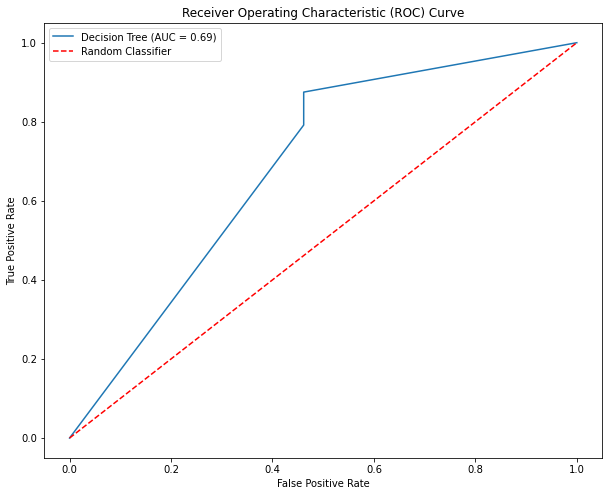

In [12]:
# Get the model's probability predictions for the positive class
y_pred_proba_dt = dt_clf.predict_proba(X_test)[::,1]

# Compute the ROC curve
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_proba_dt)

# Calculate AUC
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

## 5. Visualizing the Decision Tree

visualizing the decision tree can be done using libraries like `sklearn` and `matplotlib`. Here is how you could add a visualization of the decision tree to the activity:

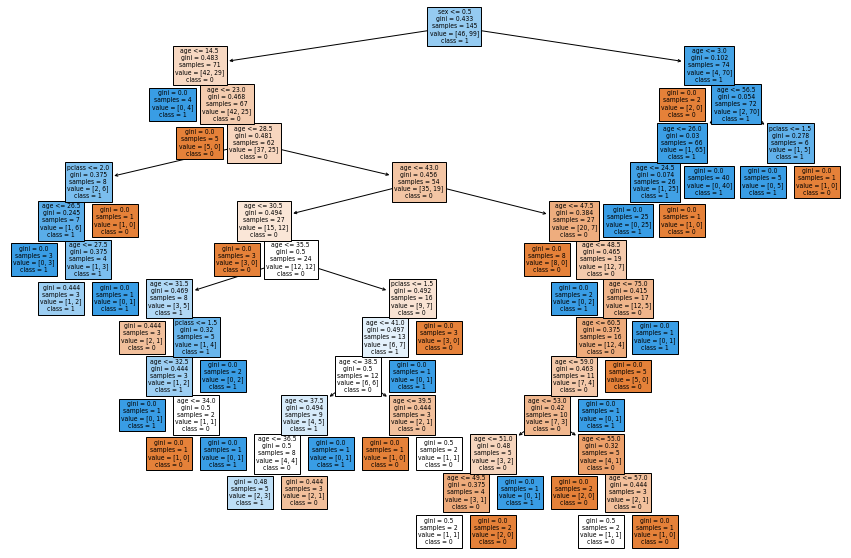

In [15]:
# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(dt_clf, feature_names=X.columns, class_names=['0','1'], filled=True)
plt.show()


This will produce a visual representation of the decision tree. Each node in the tree represents a decision (a split), with the topmost node being the first (best) decision the model makes based on the features.

This code creates a decision tree, fits it to the training data, and then uses matplotlib and sklearn.tree's plot_tree function to create a visual representation of the decision tree. The feature_names parameter is used to label the splits, and the class_names parameter is used to label the leaves.

Remember that decision trees can get very complex when dealing with large datasets, so the resulting plot might be too large and complicated to be easily interpretable if your dataset has a lot of features or if the tree is very deep.

This will generate a plot of the decision tree. Each node in the tree represents a decision (a split), with the topmost node being the first (best) decision the model makes based on the features. This can help you understand what factors the model considers important in predicting a passenger's survival.

# Random Forest

Random Forest is an ensemble method that trains multiple decision trees and averages their predictions.

## 1. Model Training

In [13]:
# Initialize the model
rf_clf = RandomForestClassifier(random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 2. Model Evaluation

- Confusion Matrix

In [14]:
# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.7567567567567568
Confusion Matrix:
[[ 7  6]
 [ 3 21]]


In [15]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.78      0.88      0.82        24

    accuracy                           0.76        37
   macro avg       0.74      0.71      0.72        37
weighted avg       0.75      0.76      0.75        37



- ROC Curve 

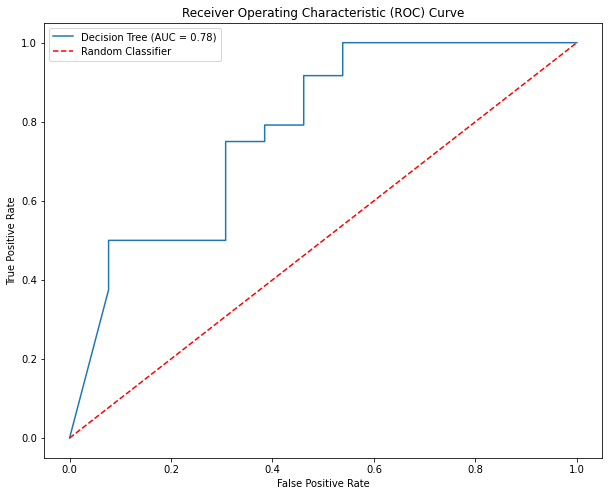

In [16]:
# Get the model's probability predictions for the positive class
y_pred_proba_rf = rf_clf.predict_proba(X_test)[::,1]

# Compute the ROC curve
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_proba_rf)

# Calculate AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Decision Tree (AUC = {roc_auc_rf:.2f})')

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

# Comparison : Decision Tree vs Random Forest 

Besides accuracy and the confusion matrix, another way to evaluate model performance is the ROC Curve, which shows the trade-off between true positive rate and false positive rate. The area under the ROC Curve (AUC) can be used as a single number summary of model performance.

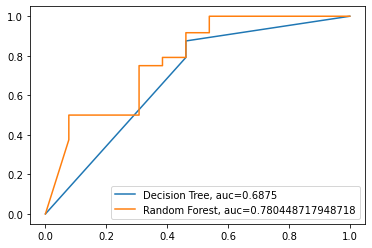

In [17]:
# Decision Tree
plt.plot(fpr_dt,tpr_dt,label="Decision Tree, auc="+str(roc_auc_dt))

# Random Forest
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc="+str(roc_auc_rf))

plt.legend(loc=4)
plt.show()

This will plot ROC curves for both the Decision Tree and Random Forest classifiers, along with their respective AUC scores. This graphical comparison can be really helpful to understand which model performs better on your classification task.